<a href="https://colab.research.google.com/github/marreapato/Deep_Learning_Course/blob/main/lucas_image_segmentation_desafio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semantic segmentation

  1. **Image segmentation task**: It divides an image into multiple segments or regions, each representing a coherent and visually meaningful object or part of the image.
  2. **Semantic segmentation task**: it classifies each pixel of the input image as a semantic category
  3. **Instance segmentation**: it classifies each input image pixel as an object-instance. Thus, it recognizes the semantics and instance.




### Encoder-Decoder and Segmentation head
  1. **Encoder**: Given a input vector, it summarize, filter, extract useful information, or create a lower dimension representation
  2. **Decoder** Takes the abstract features from the encoder and produce a pixel-wise classification map with the same spatial dimensions as the input image
  3. **Analogy**: Given a summary information (Encoder), how to reconstruct the complete one (Decoder)?
  4. **Analogy**: Given a small puzzle, how to create a large version of it?
  5. Transposed Convolutional layer

  ##### References:
    1. Dumoulin, Vincent, and Francesco Visin. "A guide to convolution arithmetic for deep learning." arXiv preprint arXiv:1603.07285 (2016).
    2. https://towardsdatascience.com/what-is-transposed-convolutional-layer-40e5e6e31c11
    3. https://d2l.ai/chapter_computer-vision/transposed-conv.html



### **Loss**

#### **Pixel-wise Cross-entropy loss**
It is used to train neural networks for semantic segmentation. It computes the loss for each pixel individually and then aggregates these losses to quantify the overall quality of the segmentation.

It is designed to measure the dissimilarity between the predicted pixel-wise class probabilities and the ground truth labels in an image.

<img src='https://www.jeremyjordan.me/content/images/2018/05/Screen-Shot-2018-05-24-at-10.46.16-PM.png'>


#### **Dice score loss**
It denotes the overlap between the output and target mask, and ranges from 0 to 1.

  1. Dice score = $\frac{2 \times |A \cap B|}{|A| + |B|}$
  

Reference

1. https://www.jeremyjordan.me/semantic-segmentation/#loss
2. https://medium.com/mlearning-ai/understanding-evaluation-metrics-in-medical-image-segmentation-d289a373a3f#:~:text=The%20difference%20between%20the%20two,of%20pixel%20in%20both%20images.




### Evaluate metrics (IoU, ...)
  1. Dice Similarity Coefficient     
  2. Hausdorff Surface Distance              
  3. Sensitivity (TP)         
  4. Specificity (TN)         
  5. Precision   
  4. Dice score vs IoU score
  
  Dice score penalizes false positives (extra predicted area) more than false negatives (missing predicted area), which is relevant when dealing with small objects like tumors. For small masks, the intersection area can be very small, even if the predicted mask is quite accurate. This can lead to a lower IoU score, making it difficult to accurately assess the quality of the segmentation, especially when the masks are small compared to the entire image.

  In some cases, both metrics may provide similar insights, but in others, the Dice score can offer a more nuanced perspective, particularly when dealing with small and complex object segmentation.

# Segmentation Models Pytorch

1. Introduction to SMP library
2. https://github.com/qubvel/segmentation_models.pytorch/tree/master
3. https://smp.readthedocs.io/en/latest/
4. Tutorial based on https://github.com/qubvel/segmentation_models.pytorch/blob/master/examples/cars%20segmentation%20(camvid).ipynb

# Install requirements

In [1]:
! pip install segmentation-models-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.4 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=fc0749307a626218720bc2fa046ef9a1979d8cfe6e6d9b35ae6cf9cd9da01d87
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60943 sha256=188528a3f544c1e50cbfc67a61d4dcc84f850e46b7cf265089a3cd4a85fafc5f
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f53

In [2]:
import segmentation_models_pytorch as smp

model = smp.Unet(
    encoder_name="resnet34",
    #encoder_weights="imagenet",
    encoder_weights=None,
    in_channels=1,
    classes=3,
)

In [3]:
model.cuda()

Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [4]:
import torch

#Random grey-scale image with 224*224 (width x height) pixels
x = torch.randn(1, 1, 224, 224)

#Forward
output = model(x.cuda())
print('Raw output shape:', output.shape)

#Output argmax
pixel_pred = output.argmax(1)
print('Pixel prediction shape:', pixel_pred.shape)

Raw output shape: torch.Size([1, 3, 224, 224])
Pixel prediction shape: torch.Size([1, 224, 224])


In [5]:
pixel_pred

tensor([[[1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         ...,
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         [0, 2, 1,  ..., 2, 1, 1]]], device='cuda:0')

# Dataset

1. [Cambridge-driving Labeled Video Database (CamVid)](http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamVid/)
2. Almost ten minutes of video
3. 32 semantic labels (Animal, Pedestrian, Child, Rolling cart/luggage/pram, Bicyclist, Motorcycle/scooter, Car (sedan/wagon), SUV / pickup truck, Truck / bus, Train, Misc, Road == drivable surface, Shoulder, Lane markings drivable,
Non-Drivable, Sky, Tunnel, Archway, Building, Wall, Tree, Vegetation misc.,
Fence, Sidewalk, Parking block, Column/pole, Traffic cone, Bridge, Sign / symbol, Misc text, Traffic light, Other)

#### Download

In [6]:
import os


DATA_DIR = './data/CamVid/'

# load repo with data if it is not exists
if not os.path.exists(DATA_DIR):
    print('Loading data...')
    os.system('git clone https://github.com/alexgkendall/SegNet-Tutorial ./data')
    print('Done!')

x_train_dir = os.path.join(DATA_DIR, 'train')
y_train_dir = os.path.join(DATA_DIR, 'trainannot')

x_valid_dir = os.path.join(DATA_DIR, 'val')
y_valid_dir = os.path.join(DATA_DIR, 'valannot')

x_test_dir = os.path.join(DATA_DIR, 'test')
y_test_dir = os.path.join(DATA_DIR, 'testannot')

Loading data...
Done!


In [7]:
x_train_dir

'./data/CamVid/train'

## Dataset loader

1. Imports
2. Custom Dataset to read CamVid

In [8]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

### Building a custom torch.utils.data.Dataset to read the CamVidDataset

In [133]:
class CamVidDataset(Dataset):
    """CamVid Dataset. Read images, apply augmentation and preprocessing transformations.

    Args:
        images_dir (str): path to images folder
        masks_dir (str): path to segmentation masks folder
        classes (list): values of classes to extract from segmentation mask
        augmentation (albumentations.Compose): data transfromation pipeline
            (e.g. flip, scale, etc.)
        preprocessing (albumentations.Compose): data preprocessing
            (e.g. noralization, shape manipulation, etc.)

    """

    CLASSES = ['sky', 'building', 'pole', 'road', 'pavement',
               'tree', 'signsymbol', 'fence', 'car',
               'pedestrian', 'bicyclist', 'unlabelled']

    def __init__(
            self,
            images_dir,
            masks_dir,
            classes=None,
            augmentation=None,
            preprocessing=None,
    ):
        self.ids = os.listdir(images_dir)
        self.images_fps = [os.path.join(images_dir, image_id) for image_id in self.ids]
        self.masks_fps = [os.path.join(masks_dir, image_id) for image_id in self.ids]

        # convert str names to class values on masks
        self.class_values = [self.CLASSES.index(cls.lower()) for cls in classes]

        self.augmentation = augmentation
        self.preprocessing = preprocessing

    def __getitem__(self, i):
        # read image
        image = cv2.imread(self.images_fps[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # read mask
        mask = cv2.imread(self.masks_fps[i], 0)

        # Build a binary mask for each class
        masks = [(mask == v) for v in self.class_values]
        mask = np.stack(masks, axis=-1).astype('float')

        # apply augmentations
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']

        # apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']

        return image, mask

    def visualize_sample(self, i):
      image, mask = self[i] #same as self.__getitem__(i)

      print("Type of image and mask:", type(image), type(mask))
      print("Checking if image is np.ndarray:", isinstance(image, np.ndarray))
      print("Shape of image and mask:", image.shape, mask.shape)

      """PLot images in one row."""
      if(mask.shape[2]!=3 and mask.shape[1]==480):
          mask=mask.argmax(2).reshape(360,480,1)#shaping image segmentation labels to plot all masks of chosen classes
      elif(mask.shape[2]!=3 and mask.shape[1]==320):
          mask=mask.argmax(2).reshape(320,320,1)#shaping image segmentation labels to plot all masks of chosen classes

      fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(16, 5))
      axs[0].imshow(image)
      axs[1].imshow(mask)
      plt.show()

    def __len__(self):
        return len(self.ids)

#### Instance of our CamVidDataset class

In [134]:
dataset = CamVidDataset(
    x_train_dir,
    y_train_dir,
    classes=['sky', 'building', 'pole', 'road', 'pavement',
               'tree', 'signsymbol', 'fence', 'car',
               'pedestrian', 'bicyclist', 'unlabelled'],
    augmentation=None,
    preprocessing=None,
  )

#### Visualizing the CamVidDataset samples

In [135]:
fps_idx = 10

image, mask = dataset[fps_idx] # get some sample
print(np.unique(mask))

[0. 1.]


In [136]:
mask.shape

(360, 480, 12)

In [137]:
mask.argmax(2).reshape(360, 480,1).shape

(360, 480, 1)

In [138]:
mask.reshape(-1,360,480,1)[0].shape

(360, 480, 1)

Type of image and mask: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Checking if image is np.ndarray: True
Shape of image and mask: (360, 480, 3) (360, 480, 12)


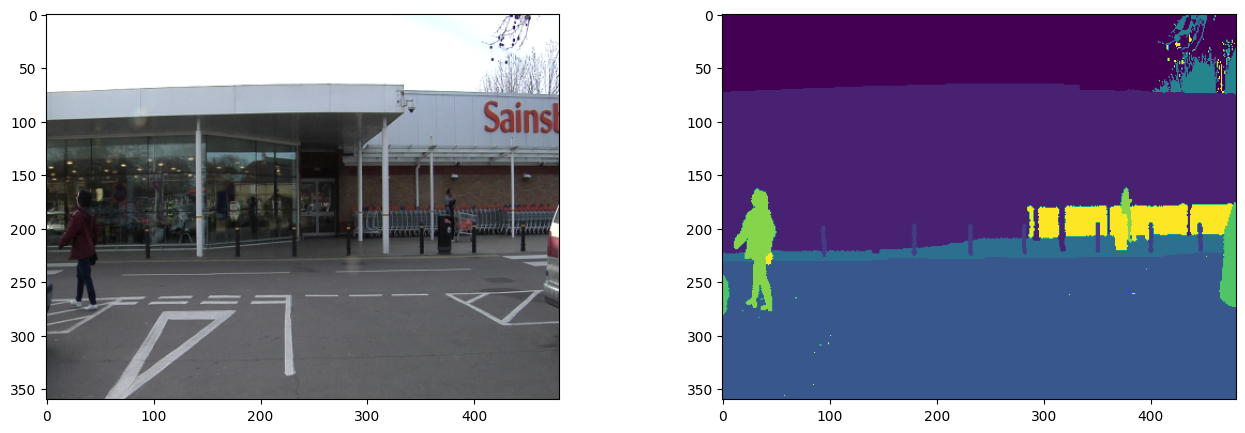

In [139]:
dataset.visualize_sample(fps_idx)

In [140]:
import albumentations as albu

def get_training_augmentation():
    """
    These augmentations functions are called by
    CamVidDataset.__getitem__ -> augmentation(image=image, mask=mask)
    """
    width = 320
    height = 320
    train_transform = [
        albu.HorizontalFlip(p=0.5),
        albu.ShiftScaleRotate(
            scale_limit=0.5, rotate_limit=0,
            shift_limit=0.1, p=0.5, border_mode=0
            ),
        albu.PadIfNeeded(
            min_height=height, min_width=width,
            always_apply=True, border_mode=0
            ),
        albu.RandomCrop(height=height, width=width, always_apply=False),
        albu.IAAAdditiveGaussianNoise(p=0.2),
        albu.IAAPerspective(p=0.5),
        albu.OneOf(
            [
                albu.CLAHE(p=1),
                albu.RandomBrightness(p=1),
                albu.RandomGamma(p=1),
            ],
            p=0.5,
        ),
        albu.OneOf(
            [
                albu.Blur(blur_limit=3, p=1),
                albu.MotionBlur(blur_limit=3, p=1),
            ],
            p=0.5,
        ),
        albu.OneOf(
            [
                albu.RandomContrast(p=1),
                albu.HueSaturationValue(p=1),
            ],
            p=0.5,
        ),
    ]

    return albu.Compose(train_transform)


def get_validation_augmentation():
    """Add paddings to make image shape divisible by 32"""
    test_transform = [
        albu.PadIfNeeded(384, 480)
    ]
    return albu.Compose(test_transform)


def to_tensor(x, **kwargs):
    """
    Given a numpy array x of shape (H, W, C), it transpose the array
    to (C, H, W) and convert the data type to float32.
    """
    return x.transpose(2, 0, 1).astype('float32')


def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform

    Args:
        preprocessing_fn (callbale): data normalization function
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose

    """

    #Lambda documentation: https://albumentations.ai/docs/api_reference/augmentations/transforms/#albumentations.augmentations.transforms.Lambda
    _transform = [
        albu.Lambda(name='preprocessing', image=preprocessing_fn),
        albu.Lambda(name='totensor', image=to_tensor, mask=to_tensor),
    ]
    return albu.Compose(_transform)

#### Visualizing images from augmented dataset

In [141]:
augmented_dataset = CamVidDataset(
    x_train_dir,
    y_train_dir,
    classes=['sky', 'building', 'pole', 'road', 'pavement',
               'tree', 'signsymbol', 'fence', 'car',
               'pedestrian', 'bicyclist', 'unlabelled'],
    augmentation=get_training_augmentation(),
    preprocessing=None,
)

/usr/local/lib/python3.10/dist-packages/albumentations/imgaug/transforms.py:261: FutureWarning: IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead
  warnings.warn("IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead", FutureWarning)
/usr/local/lib/python3.10/dist-packages/albumentations/imgaug/transforms.py:384: FutureWarning: This IAAPerspective is deprecated. Please use Perspective instead
  warnings.warn("This IAAPerspective is deprecated. Please use Perspective instead", FutureWarning)
/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/transforms.py:1258: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/transforms.py:1284: FutureWarning: RandomContrast has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(


Type of image and mask: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Checking if image is np.ndarray: True
Shape of image and mask: (320, 320, 3) (320, 320, 12)


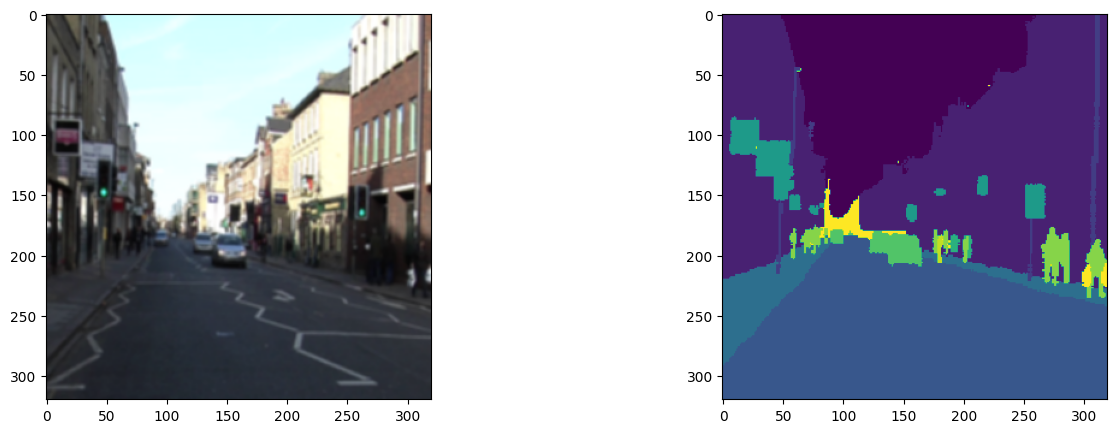

Type of image and mask: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Checking if image is np.ndarray: True
Shape of image and mask: (320, 320, 3) (320, 320, 12)


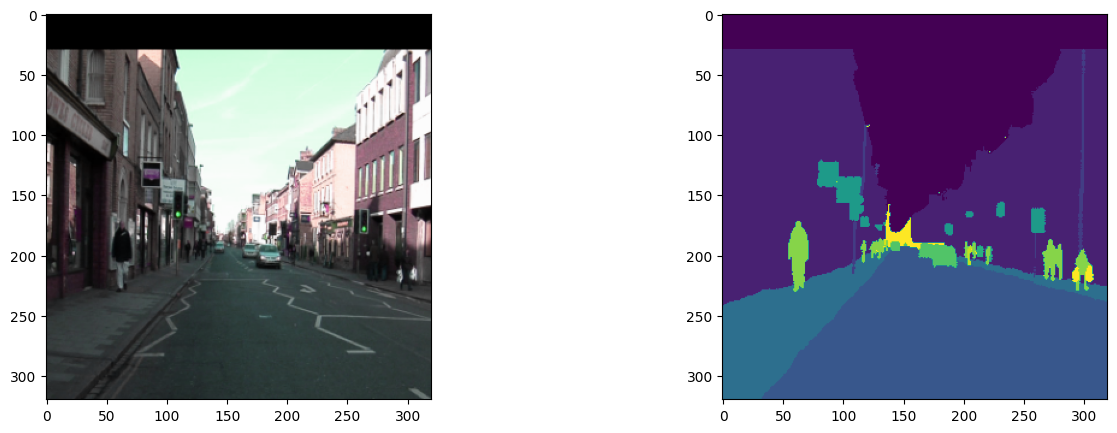

Type of image and mask: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Checking if image is np.ndarray: True
Shape of image and mask: (320, 320, 3) (320, 320, 12)


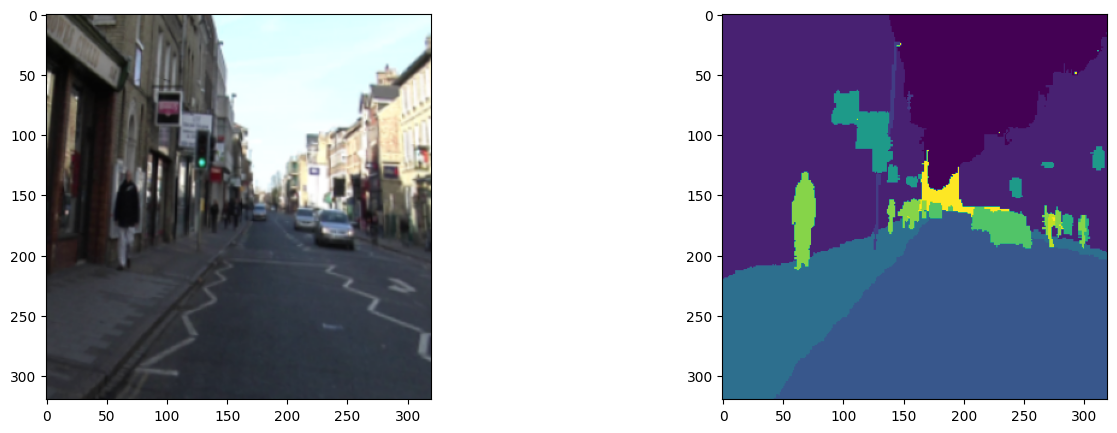

In [142]:
fps_idx = 1
# same image with different augmentation run
for i in range(3):
    augmented_dataset.visualize_sample(fps_idx)

# Model and Training

### Training function

In [143]:
from tqdm.notebook import tqdm

def epoch(dataloader, model, loss, optimizer, metrics):
  model.cuda()
  model.train()

  total_loss = 0.0
  total_metrics = {}
  num_batches = 0

  for metric_fn in metrics:
    metric_name = metric_fn.__name__
    total_metrics[metric_name] = 0

  for x, y in tqdm(dataloader):
    x, y = x.cuda(), y.cuda()

    optimizer.zero_grad()
    prediction = model.forward(x)

    loss_batch = loss(prediction, y)
    loss_batch.backward()

    optimizer.step()

    # update loss logs
    loss_value = loss_batch.cpu().detach().numpy()
    total_loss += loss_value


    # update metrics logs
    for metric_fn in metrics:
        metric_value = metric_fn(prediction, y).cpu().detach().numpy()
        metric_name = metric_fn.__name__
        total_metrics[metric_fn.__name__] += metric_value

    num_batches += 1

  for metric in total_metrics.keys():
    total_metrics[metric] /= num_batches

  return total_loss/num_batches, total_metrics

### Setup

1. Hyperparameters
2. Model architecture
3. Datasets
4. Dataloaders
5. Loss
6. Metrics
7. Optimizer

In [144]:
import torch
import numpy as np
import segmentation_models_pytorch as smp
from segmentation_models_pytorch import utils
from segmentation_models_pytorch.utils.metrics import Precision, Recall



ENCODER = 'resnet50'
ENCODER_WEIGHTS = 'imagenet'
CLASSES = ['sky', 'building', 'pole', 'road', 'pavement', 'tree', 'signsymbol', 'fence', 'car', 'pedestrian', 'bicyclist', 'unlabelled']
ACTIVATION = 'sigmoid'
DEVICE = 'cuda'

# create segmentation model with pretrained encoder
model = smp.Unet(
    encoder_name=ENCODER,
    encoder_weights=ENCODER_WEIGHTS,
    classes=len(CLASSES),
    activation=ACTIVATION,
)

preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)


train_dataset = CamVidDataset(
    x_train_dir,
    y_train_dir,
    augmentation=get_training_augmentation(),
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)

valid_dataset = CamVidDataset(
    x_valid_dir,
    y_valid_dir,
    augmentation=get_validation_augmentation(),
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)

train_loader = DataLoader(
    train_dataset,
    batch_size=8,
    shuffle=True,
    num_workers=2
    )

valid_loader = DataLoader(
    valid_dataset,
    batch_size=1,
    shuffle=False,
    num_workers=2
    )

loss = smp.losses.DiceLoss(mode='binary')

# Create a Precision metric instance
precision = Precision(activation='sigmoid')

# Create a Recall metric instance
recall = Recall(activation='sigmoid')  # You can adjust the activation function if needed

metrics = [
    utils.metrics.IoU(threshold=0.5),
    precision,
    recall,
]

optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001)

In [145]:
preprocessing_fn

functools.partial(<function preprocess_input at 0x7d5483953880>, input_space='RGB', input_range=[0, 1], mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

### Training loop

In [146]:
num_epochs = 30
for i in range(num_epochs):
  total_loss, total_metrics = epoch(train_loader, model, loss, optimizer, metrics)
  print('Epoch: ', i)
  print('Total loss:', total_loss)
  print('Total metrics:', total_metrics)
  print()
  if i > 0 and i % 10 == 0:
    optimizer.param_groups[0]['lr'] = 1e-5
    print('Decrease decoder learning rate to 1e-5!')

  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  0
Total loss: 0.8482354231502699
Total metrics: {'iou_score': 0.14024011968918468, 'precision': 0.07900317644943362, 'recall': 1.0}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  1
Total loss: 0.8398683719013048
Total metrics: {'iou_score': 0.19449342625296634, 'precision': 0.07982820515399394, 'recall': 1.0}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  2
Total loss: 0.8381441391032675
Total metrics: {'iou_score': 0.24262196667816327, 'precision': 0.07856952172258626, 'recall': 1.0}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  3
Total loss: 0.83424028624659
Total metrics: {'iou_score': 0.2806112720914509, 'precision': 0.07886037748792897, 'recall': 1.0}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  4
Total loss: 0.8320566350999086
Total metrics: {'iou_score': 0.3715029274639876, 'precision': 0.07842677054197891, 'recall': 1.0}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  5
Total loss: 0.8300555827824966
Total metrics: {'iou_score': 0.40075573649095453, 'precision': 0.0782016110808953, 'recall': 1.0}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  6
Total loss: 0.827164140732392
Total metrics: {'iou_score': 0.42093451904213947, 'precision': 0.07850983285385629, 'recall': 1.0}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  7
Total loss: 0.825740327005801
Total metrics: {'iou_score': 0.44877301869185077, 'precision': 0.07823401867695477, 'recall': 1.0}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  8
Total loss: 0.8231616512588833
Total metrics: {'iou_score': 0.5149831739456757, 'precision': 0.07878428357450859, 'recall': 1.0}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  9
Total loss: 0.8208645102770432
Total metrics: {'iou_score': 0.5783907913643381, 'precision': 0.07914802302484927, 'recall': 1.0}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  10
Total loss: 0.8202738178812939
Total metrics: {'iou_score': 0.597576239834661, 'precision': 0.07895787886303404, 'recall': 1.0}

Decrease decoder learning rate to 1e-5!


  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  11
Total loss: 0.8189807158449421
Total metrics: {'iou_score': 0.6176276919634446, 'precision': 0.07923620987845503, 'recall': 1.0}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  12
Total loss: 0.8190913887127586
Total metrics: {'iou_score': 0.6209097426870595, 'precision': 0.07908859573628592, 'recall': 1.0}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  13
Total loss: 0.8194133755953416
Total metrics: {'iou_score': 0.6233414398587268, 'precision': 0.07879057931511299, 'recall': 1.0}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  14
Total loss: 0.8211031219233638
Total metrics: {'iou_score': 0.6172157150247822, 'precision': 0.07796937000492345, 'recall': 1.0}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  15
Total loss: 0.8213893291742905
Total metrics: {'iou_score': 0.6173037977322288, 'precision': 0.07774166940994885, 'recall': 1.0}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  16
Total loss: 0.818188567524371
Total metrics: {'iou_score': 0.6315779893294625, 'precision': 0.0792929071771062, 'recall': 1.0}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  17
Total loss: 0.8187415159266928
Total metrics: {'iou_score': 0.631721547116404, 'precision': 0.07896560219966847, 'recall': 1.0}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  18
Total loss: 0.8177123393701471
Total metrics: {'iou_score': 0.6348912171695543, 'precision': 0.07940456595109857, 'recall': 1.0}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  19
Total loss: 0.8182749320631442
Total metrics: {'iou_score': 0.6302613292051398, 'precision': 0.07910602815125299, 'recall': 1.0}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  20
Total loss: 0.8187685634778894
Total metrics: {'iou_score': 0.6368467665236929, 'precision': 0.07872802326860635, 'recall': 1.0}

Decrease decoder learning rate to 1e-5!


  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  21
Total loss: 0.8203221261501312
Total metrics: {'iou_score': 0.6296917731347291, 'precision': 0.07792999465828357, 'recall': 1.0}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  22
Total loss: 0.8208756109942561
Total metrics: {'iou_score': 0.6261215715304665, 'precision': 0.07764692393981892, 'recall': 1.0}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  23
Total loss: 0.8195144223130267
Total metrics: {'iou_score': 0.6320249451243359, 'precision': 0.07825951974677003, 'recall': 1.0}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  24
Total loss: 0.8183553037436112
Total metrics: {'iou_score': 0.6339533665905828, 'precision': 0.07884330658808998, 'recall': 1.0}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  25
Total loss: 0.818365243466004
Total metrics: {'iou_score': 0.6366087975709335, 'precision': 0.07877368771511575, 'recall': 1.0}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  26
Total loss: 0.8180681441141211
Total metrics: {'iou_score': 0.6439215592716051, 'precision': 0.07875291112324466, 'recall': 1.0}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  27
Total loss: 0.8196327621522157
Total metrics: {'iou_score': 0.6360500234624614, 'precision': 0.07797932479044666, 'recall': 1.0}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  28
Total loss: 0.8153978599154431
Total metrics: {'iou_score': 0.6539004911547122, 'precision': 0.08002398535609245, 'recall': 1.0}



  0%|          | 0/46 [00:00<?, ?it/s]

Epoch:  29
Total loss: 0.8191018545109293
Total metrics: {'iou_score': 0.6423695178135581, 'precision': 0.07812000195617261, 'recall': 1.0}



# Saving the model checkpoint

In [147]:
#summary = {'model_state...'}
torch.save(model.state_dict(), "Unet.pt")

# Pipeline to use the model

1. Load the model
2. Get image from validation dataset
3. Feed the model

In [148]:
loaded_unet = smp.Unet(
    encoder_name=ENCODER,
    encoder_weights=ENCODER_WEIGHTS,
    classes=len(CLASSES),
    activation=ACTIVATION,
)

loaded_unet.load_state_dict(torch.load("Unet.pt"))

<All keys matched successfully>

In [149]:
loaded_unet.cuda()
loaded_unet.eval()

Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
      

In [205]:
img_id = 50

x, target = next(iter(valid_loader))

print(type(x), type(target))
print(x.shape, target.shape)

output = loaded_unet(x.cuda())
output.shape

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([1, 3, 384, 480]) torch.Size([1, 12, 384, 480])


torch.Size([1, 12, 384, 480])

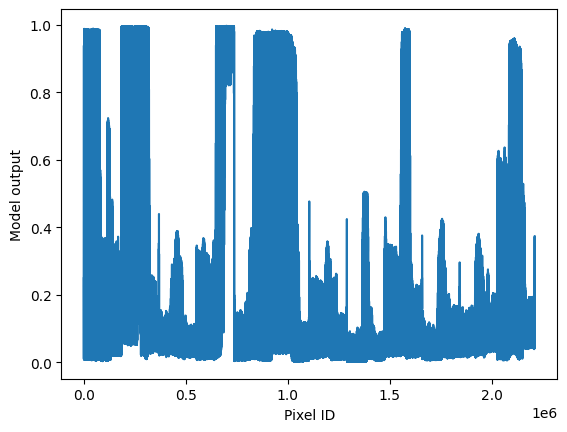

In [206]:
import matplotlib.pyplot as plt

plt.plot(output.flatten().cpu().tolist())
plt.xlabel('Pixel ID')
plt.ylabel('Model output')
plt.show()

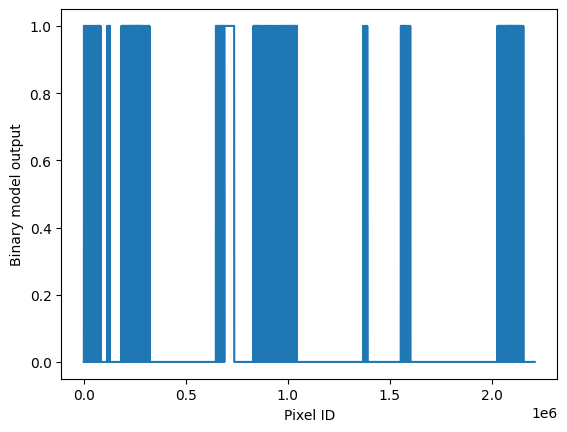

In [207]:
import matplotlib.pyplot as plt

plt.plot((output.flatten() >= 0.5).cpu().tolist())
plt.xlabel('Pixel ID')
plt.ylabel('Binary model output')
plt.show()

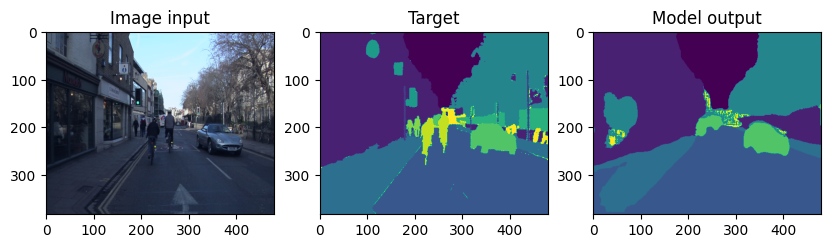

In [209]:
def norm01(x):
  """
  Given an input vector x, it normalizes the vector to be between 0 and 1.
  """
  xmin = x.min()
  xmax = x.max()

  return (x - xmin)/(xmax - xmin)

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(10, 10))
axs[0].imshow(norm01(x[0].permute(1, 2, 0).detach().cpu()))
axs[0].set_title('Image input')

axs[1].imshow(target[0].permute(1, 2, 0).cpu().detach().argmax(2).reshape(384,480,-1))
axs[1].set_title('Target')

axs[2].imshow(output[0].permute(1, 2, 0).cpu().detach().argmax(2).reshape(384,480,-1))
axs[2].set_title('Model output')

plt.show()

Checando shape do modelo (target e output)

In [192]:
target[0].permute(1, 2, 0).cpu().detach().shape

torch.Size([384, 480, 12])

In [191]:
target[0].argmax(0).reshape(384,480,-1).shape

torch.Size([384, 480, 1])

In [196]:
target[0].permute(1, 2, 0).cpu().detach().argmax(2).reshape(384,480,-1).shape

torch.Size([384, 480, 1])

In [198]:
output[0].permute(1, 2, 0).cpu().detach().argmax(2).reshape(384,480,-1).shape

torch.Size([384, 480, 1])